# Infinite mixture model を Variational inferenceで

Variational inference でDirichlet process infinite mixture model をしたくなったので適当に[Lin 2013](http://papers.nips.cc/paper/4968-online-learning-of-nonparametric-mixture-models-via-sequential-variational)を見つけて読んで実装する.



## 1. Introduction

## 2. Related Work

## 3. Nonparametric Mixture Models

$$
D = \sum_{k=1}^{\infty}\pi_k\delta_{\phi_k}, \;
\operatorname{with} \pi_k = v_k\prod_{l=1}^{k-1}v_l, \;
v_k \propto \operatorname{Beta} \left( 1, \alpha_k\right), \;
\forall k = 1, 2, ... \tag{1} \\
$$

$$
D \propto DP\left( \alpha \mu\right), \;
\theta_i \propto \mu , \;
x_i \propto F\left( \cdot \mid \theta_i \right), \;
\forall i = 1, 2, ..., n \tag{2} \\
$$

$$
\begin{eqnarray}
z_{1:n} &\propto& \operatorname{CRP} \left( \alpha \right), \; \phi_k \propto \mu, \; \forall k = 1, 2, ... \\
x_{1:n} &\propto& F\left(\cdot \mid \phi_{z_i} \right), \; \forall i = 1, 2, ..., n  \tag{3}
\end{eqnarray}
$$

$$
p_{\operatorname {CRP}}\left( z_{1:n} \mid \alpha\right) =
\frac {\Gamma(\alpha) \alpha^K} {\Gamma(\alpha + n)} \prod_{k=1}^K \Gamma\left( | C_k| \right) \tag{4}
$$

## 4. Variational Approximation of Posterior

予測分布は以下のようになる.

$$
p\left( \theta'  \mid x_{1:n}\right) = \mathbb E_{D \mid x_{1:n}} \left\lbrack p\left( \theta' \mid D \right) \right\rbrack \tag {5}
$$

### 4.1. Posterior Analysis

$ D $ の事後分布.

$$
\begin{eqnarray}
D \mid \theta_{1:n} &\sim& \operatorname {DP} \left( \tilde {\alpha} \tilde {\mu}\right) \\
\tilde{\alpha} &=& \alpha + n \\
\tilde{\mu} &=& \frac {\alpha} {\alpha+n} \mu + \sum_{k=1}^K \frac {\left| C_k \right|} {\alpha + n} \delta_{\phi_k} \tag{6}
\end{eqnarray}
$$

$ p\left( D \mid z_{1:n}, x_{1:n} \right) $ からのサンプリングは以下のサンプリングと同じ.

$$
\begin{eqnarray}
\beta_0 D' + \sum_{k=1}^K \beta_k \delta_{\phi_k} , &&\\
&& with  \; D' \sim \operatorname {DP} \left( \alpha \mu  \right), \;
\left( \beta_0, \beta_1, ..., \beta_k \right) \sim \operatorname{Dir} \left( \alpha, m_1, ..., m_K \right), \;
\phi_k \sim \mu \mid _{C_k} \tag{7}
\end{eqnarray}
$$

ここで, $m_k = |C_k|$, $\mu \mid _{C_k}$ は 事後分布 $ \mu \mid _{C_k}\left( \operatorname d \theta \right) \propto \mu\left( \operatorname d \theta  \right) \prod_{i\in C_k} F \left( x_i \mid \theta \right)$

つまり$1:n$ までのデータが収まった中華料理店にもう１件データが追加された, という状態. $ \beta_k $ で既存のテーブルkに座り, $\beta_0$で新規テーブルが作られそこに座る. $\beta$の総和は1.

データ $ x_{1:n} $ が得られたときの混合分布 $ D $ の事後確率.

$$
p\left( D \mid x_{1:n} \right) = \sum_{z_{1:n}} p\left(z_{1:n} \mid x_{1:n} \right)p\left( D \mid x_{1:n}, z_{1:n}\right) \tag{8}
$$



$$
p \left( z_{1:n} \mid x_{1:n} \right)
\propto
    p_{\operatorname {CRP}} \left( z_{1:n} \mid \alpha \right)
    \prod_{k=1}^{K^{(z)}} \int \mu \left( \operatorname {d} \phi_{k} \right)
    \prod_{i \in C_k^{(z)}} F\left( x_i \mid \phi_k \right) \tag{9}
$$

## 4.2 Variational Approximation

(8)について, $p\left(z_{1:n} \mid x_{1:n} \right)$を因子分解可能とし, $ p\left( D \mid z_{1:n}, x_{1:n} \right) $ を(11)の確率過程で近似する.

$$
q\left(D \mid \rho, \nu \right) = \sum_{z_{1:n}} \prod_{i=1}^n \rho_i\left(z_i \right)q_{\nu}^{(z)}\left( D \mid z_{1:n}\right) \tag{10}
$$

$$
\begin{eqnarray}
q_{\nu}^{(z)} \left( D \mid z_{1:n}\right) \overset{d} {\sim} && \beta_0 D' + \sum_{k=1}^K\beta_k\delta{\phi_k} \\
&&with \; D' \sim \operatorname {DP} \left( \alpha \mu \right), \;
\left( \beta_0, \beta_1, ..., \beta_k \right) \sim \operatorname{Dir} \left( \alpha, m_1^{(z)}, ..., m_K^{(z)} \right), \;
\phi_k \sim \nu_k\tag{11}
\end{eqnarray}
$$

(10), (11)と(8), (9)はよく似ている. 違いは, 

1.  $p\left(z_{1:n} \mid x_{1:n} \right)$を因子分解可能とし, $ \prod_{i=1}^n \rho_i\left(z_i \right)$ で近似したこと
2.  $\mu |_{C_k}$ を $\nu_k$ で近似したこと 

$$
\mathbb E_{q\left( D \mid \rho, \nu  \right)}\left\lbrack p\left(\theta'  \mid D \right) \right\rbrack
=
    \frac {\alpha} {\alpha + n} \mu\left( \theta ' \right)
    + \sum_{k=1}^K \frac {\sum_{i=1}^n \rho_i\left( k \right)} {\alpha + n} \nu_k\left( \theta'\right) \tag{12}
$$

### 4.3 Sequential Approximation

$$
\tag{15}
\rho_{i+1} \propto \left\{ \begin{array}{ll}
    w_k^{(i)} \int_\theta F\left( x_{i+1} \mid \theta \right) \nu_k^{(i)} \left( d \theta \right) & (k \le K), \\
    \alpha \int_\theta F\left( x_{i+1} \mid \theta \right) \mu \left( d \theta \right) & (k = K+1), \\
  \end{array} \right.
$$

with $ w_i^{(i)} = \sum_{j=1}^i \rho_j\left(k \right)$, and 

$$
\tag{16}
\nu_{k}^{(i+1)}\left( d\theta \right) \propto \left\{ \begin{array}{ll}
    \mu\left( d\theta \right) \prod_{j=1}^{i+1} F\left( x_j \mid \theta \right)^{\rho_j(k)}
    & (k \le K), \\
    \mu\left( d\theta \right) F\left( x_{i+1} \mid \theta \right)^{\;\rho_{i+1}(k)}
    & (k = K+1), \\
  \end{array} \right.
$$

$\rho_1 = 1, K = 1$ から開始する, $i$を増やすたびに, $\rho_{i+1}$の計算, $w_k$ の更新, Kの更新, $\nu$の更新(, と$\rho$の更新も?)を繰り返す. Kをインクリメントするかどうかは, $\rho_{i+1}\left( K+1 \right) $ がしきい値以上であるか否かで判定する. Kをインクリメントしない場合は, $\rho_{i+1}\left( K+1 \right) $は不要なので削除, $\rho_{i+1}\left( 1,..., K \right) $の総和が1になるように標準化する.

## Normal-Wishart分布を基底分布にしてinfinite mixture multivariate normal modelを実装してみる.

多変量正規分布のInfinite mixture モデルを考える. 分布のパラメータとして, 平均と精度行列を推定する. Dirichlet Processの基底分布はNormal-Wishart分布.

$$
\begin{eqnarray}
\nu_k &=& \left(\boldsymbol \mu_k, \boldsymbol \Lambda_k \right) \sim
    \mathcal N \left(\boldsymbol \mu_{k} \mid \mathbf m_{0}, \left(\beta_{0} \boldsymbol \Lambda_{k} \right)^{-1}\right)
    \mathcal W\left(\boldsymbol \Lambda_{k} \mid \mathbf W_{0}, \nu_{0}\right)
\end{eqnarray}
$$

(16)の上の式を考える.

$$
\begin{eqnarray}
\mu\left( d\theta \right) \prod_{j=1}^{i+1} F\left( x_j \mid \theta \right)^{\rho_j(k)}
&=&
    \prod_{j=1}^{i+1}\mathcal N \left( x_{j} \mid \boldsymbol \mu_k, \boldsymbol \Lambda_k^{-1} \right)^{\;\rho_j(k)}
    \mathcal N \left(\boldsymbol \mu_{k} \mid \mathbf m_{0}, \left(\beta_{0} \boldsymbol \Lambda_{k} \right)^{-1}\right)
    \mathcal W\left(\boldsymbol \Lambda_{k} \mid \mathbf W_{0}, \nu_{0}\right)
\end{eqnarray}
$$

多変量正規分布+事前分布(Normal-Wishart分布)の形だが, データの尤度の肩に$\rho$が乗っている点が[以前解いたもの](http://kazufusa1484.hatenablog.com/entry/2018/07/27/121549)と異なっているが, 
$ \sum_{j=1}^{i+1}\rho_j\left(k\right) = r(k)と重み付け平均\overline {\mathbf x_k} = \sum_{j=1}^{i+1} \rho_j(k) \textbf x_j  / r(k) $ を導入して, 以前の導出の$N$を$r(k)$に置き換えるとよい.

$$
\begin{eqnarray}
q^{\ast}\left(\boldsymbol \mu_{k}, \boldsymbol \Lambda_{k} \right)
&=&
    \mathcal N\left(
        \boldsymbol \mu_{k} \mid \mathbf m_k, \left(\beta_{k} \boldsymbol \Lambda_{k} \right)^{-1}\right)
    \mathcal W\left(\boldsymbol \Lambda_{k} \mid \textbf W_{k}^{-1}, \nu_{k} \right) \\
\mathbf m_k &=& \frac {r(k)\overline {\textbf x_{k}} + \beta_0 \mathbf m_0} {r(k) + \beta_0} \\
\beta_k &=& r(k)+\beta_0 \\
\textbf W_k^{-1} &=&
    \textbf W_0^{-1}
    + \frac {r(k) \beta_0}{r(k)+\beta_0}
        \left(\overline {\textbf x_{k}} - \mathbf m_0\right)
        \left(\overline {\textbf x_{k}} - \mathbf m_0\right)^{\rm T}
    + \sum_{j=1}^{i+1} \rho_j(k)
        \left(\mathbf x_{j} - \overline{ \mathbf x_k}\right)
        \left(\mathbf x_{j} - \overline{ \mathbf x_k}\right)^{\rm T} \\
\nu_k &=& r(k) + \nu_0
\end{eqnarray}
$$

クラスタのパラメータの事後分布が得られた.

また, (16)の下の式は以下となる.

$$
\begin{eqnarray}
q^{\ast}\left(\boldsymbol \mu_{k}, \boldsymbol \Lambda_{k} \right)
&=&
    \mathcal N\left(
        \boldsymbol \mu_{k} \mid \mathbf m_k, \left(\beta_{k} \boldsymbol \Lambda_{k} \right)^{-1}\right)
    \mathcal W\left(\boldsymbol \Lambda_{k} \mid \textbf W_{k}^{-1}, \nu_{k} \right) \\
\mathbf m_k &=& \frac {\rho_{i+1}(k) \textbf x_{i+1} + \beta_0 \mathbf m_0} {\rho_{i+1}(k) + \beta_0} \\
\beta_k &=& \rho_{i+1}(k)+\beta_0 \\
\textbf W_k^{-1} &=&
    \textbf W_0^{-1}
    + \frac {\rho_{i+1}(k) \beta_0}{\rho_{i+1}(k)+\beta_0}
        \left({\textbf x_{i+1}} - \mathbf m_0\right)
        \left({\textbf x_{i+1}} - \mathbf m_0\right)^{\rm T}\\
\nu_k &=& \rho_{i+1}(k) + \nu_0
\end{eqnarray}
$$

(15)の$k \le K$ の場合.


$$
\begin{eqnarray}
w_k^{(i)} \int_\theta F\left( x_{i+1} \mid \theta \right) \nu_k^{(i)} \left( d \theta \right)
&=&
    w_k^{(i)} \int
        p\left( \mathbf x_{i+1} \mid \boldsymbol \mu_k, \boldsymbol \Lambda_k \right)
        p\left( \boldsymbol \mu_k, \boldsymbol \Lambda_k \right)
    \operatorname d \boldsymbol \mu_k \operatorname d \boldsymbol \Lambda_k \\
&=&
    w_k^{(i)}
    \operatorname {St} \left(
        \mathbf x_{i+1}
        \; \middle| \;
        \boldsymbol \mu_k, 
        \frac {\beta_k\left(\nu_k + 1 - D\right)}{1+\beta_k}\textbf W_k,
        \nu_k + 1 - D
    \right)
\end{eqnarray}
$$

(15)の$k = K+1$の場合.

まず$\mathbf x_{i+1}$ が得られたときのパラメータの事後分布を求める.

$$
\begin{eqnarray}
p\left(\boldsymbol \mu, \boldsymbol \Lambda \mid \mathbf x_{i+1} \right)
&=&
    \mathcal N\left(
        \boldsymbol \mu \mid \mathbf m_1, \left(\beta_1 \boldsymbol \Lambda_1 \right)^{-1}\right)
    \mathcal W\left(\boldsymbol \Lambda_{1} \mid \textbf W_{1}^{-1}, \nu_1 \right) \\
\mathbf m_1 &=& \frac {\textbf x_{i+1} + \beta_0 \mathbf m_0} {1 + \beta_0} \\
\beta_1 &=& 1+\beta_0 \\
\textbf W_1^{-1} &=&
    \textbf W_0^{-1}
    + \frac {\beta_0}{1+\beta_0}
        \left({\textbf x_{i+1}} - \mathbf m_0\right)
        \left({\textbf x_{i+1}} - \mathbf m_0\right)^{\rm T}\\
\nu_1 &=& 1 + \nu_0
\end{eqnarray}
$$

これをもとに(15)の下の式を変形する.

$$
\begin{eqnarray}
\alpha \int_\theta F\left( x_{i+1} \mid \theta \right) \mu \left( d \theta \right)
&=&
    \alpha \int
        p\left( \mathbf x_{i+1} \mid \boldsymbol \mu, \boldsymbol \Lambda \right)
        p\left( \boldsymbol \mu, \boldsymbol \Lambda \right)
    \operatorname d \boldsymbol \mu \operatorname d \boldsymbol \Lambda \\
&=&
    \alpha \int
        p\left( \mathbf x_{i+1} \right)
    \operatorname d \boldsymbol \mu \operatorname d \boldsymbol \Lambda \\
&=&
    \alpha \times p\left( \mathbf x_{i+1} \right) \\
&=&
    \alpha \frac {1} {\pi^{\frac {D} {2}}}
    \frac {\Gamma _{D}\left({\frac {\nu_1}{2}}\right)} {\Gamma _{D}\left({\frac {\nu_0}{2}}\right)}
    \frac {\left|{\mathbf {W}_1 }\right|^{\frac {\nu_1} {2}}} {\left|{\mathbf {W}_0 }\right|^{\frac {\nu_0} {2}}}
    \left(\frac {\beta_0} {\beta_1}\right)^{\frac {D} {2}}
\end{eqnarray}
$$

ここで, 

$$
{\displaystyle \Gamma _{D}\left({\frac {n}{2}}\right)=\pi ^{D(D-1)/4}\prod _{j=1}^{D}\Gamma \left({\frac {n-j+1}{2}}\right).}
$$

なので,

$$
\begin{eqnarray}
\frac
    {\Gamma_D\left( \frac {\nu_1} {2} \right)}
    {\Gamma_D\left( \frac {\nu_0} {2} \right)}
&=&
    \frac
    {\prod^D_{j=1}\Gamma \left( \frac {\nu_1 - j + 1} {2}\right)}
    {\prod^D_{j=1}\Gamma \left( \frac {\nu_0 - j + 1} {2}\right)} \\
&=&
    \frac
    {\prod^D_{j=1}\Gamma \left( \frac {\nu_0 - j + 2} {2}\right)}
    {\prod^D_{j=1}\Gamma \left( \frac {\nu_0 - j + 1} {2}\right)} \\
&=&
    \frac
    {\Gamma \left( \frac {\nu_0 +1} {2}\right)}
    {\Gamma \left( \frac {\nu_0 -D + 1} {2}\right)} \\
\end{eqnarray}
$$

よって,

$$
\begin{eqnarray}
\alpha \int_\theta F\left( x_{i+1} \mid \theta \right) \mu \left( d \theta \right)
&=&
    \alpha \frac {1} {\pi^{\frac {D} {2}}}
    \frac
        {\Gamma \left( \frac {\nu_0 +1} {2}\right)}
        {\Gamma \left( \frac {\nu_0 -D + 1} {2}\right)} 
    \frac {\left|{\mathbf {W}_1 }\right|^{\frac {\nu_1} {2}}} {\left|{\mathbf {W}_0 }\right|^{\frac {\nu_0} {2}}}
    \left(\frac {\beta_0} {\beta_1}\right)^{\frac {D} {2}}
\end{eqnarray}
$$

以上、全部導出できた.

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy import special

import pandas as pd
pd.set_option('display.width', 200)
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import os
import subprocess
import warnings
warnings.filterwarnings('ignore')

/Users/kazufusa/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/kazufusa/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


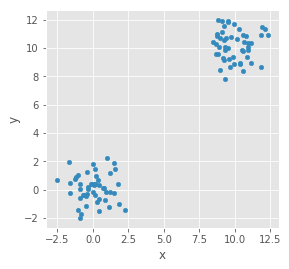

In [19]:
np.random.seed(0)
mean0 = np.array([0, 0])
cov0 = np.array([[1,0],[0,1]])
mean1 = np.array([10, 10])
cov1 = np.array([[1,0],[0,1]])
N = 100
a = 0.5
X = pd.DataFrame(
    np.r_[
        sp.random.multivariate_normal(mean0, cov0, int(N*(1-a))),
        sp.random.multivariate_normal(mean1, cov1, int(N*a))
    ],
    columns=['x', 'y']
)
X.plot(kind='scatter', x='x', y='y').set_aspect('equal')
plt.savefig('1.png', bbox_inches='tight', pad_inches=0)

In [4]:
np.random.seed(0)
x = X.sample(frac=1).values.T
D = 2

# Dirichlet process base distribution
beta_0 = 1
m_0 = np.zeros((D, 1))
# m_0 = x[:, 0].reshape(D, 1)
W_0 = np.diag([1, 1])
nu_0 = 1.1

# Dirichlet process scaling parameter
alpha = 1

In [5]:
def init():
    global mu_k, W_k, nu_k, beta_k, rho, K
    maxK = 100
    mu_k = np.zeros((maxK, D, 1))
    W_k = np.zeros((maxK, D, D))
    nu_k = np.zeros(maxK)
    beta_k = np.zeros(maxK)
    rho = np.zeros((N, maxK))

    K = 1
    rho[0, 0] = 1

init()

In [6]:
# PDF of student's t distribution
def t_pdf(x, m, Lambda, df):
    D = len(m)
    if len(x) != D:
        m = m.reshape(D, 1)
        x = x.T

    return np.diag(
        sp.special.gamma(D/2. + df/2.) /
        sp.special.gamma(df/2.) *
        np.power(np.linalg.det(Lambda), 1/2.) / 
        np.power(np.pi * df, D/2.) *
        np.power(1 + (x-m).T@Lambda@(x-m)/df, -(D+df)/2.)
    )

In [7]:
# eq15( k le K)
def eq15_1(w, D, x, mu_k, beta_k, nu_k, W_k):
    return w * t_pdf(
        x,
        mu_k,
        beta_k * (nu_k + 1 - D) * W_k / (1 + beta_k),
        (nu_k + 1 - D)
    )

# eq15(k = K + 1)
def eq15_2(alpha, D, x, m_0, beta_0, nu_0, W_0):
    m_1 = (x + beta_0 * m_0) / (1 + beta_0)
    beta_1 = 1 + beta_0
    W_1_inv = np.linalg.inv(W_0) + beta_0 / (1 + beta_0) * (x - m_0)@(x-m_0).T
    W_1 = np.linalg.inv(W_1_inv)
    nu_1 = 1 + nu_0
    
    return alpha / np.power(np.pi, D/2.) \
        * sp.special.gamma((nu_0+1.)/2.) \
        / sp.special.gamma((nu_0+1.-D)/2.) \
        * np.power(np.linalg.det(W_1), nu_1/2.) \
        / np.power(np.linalg.det(W_0), nu_0/2.) \
        * np.power(beta_0/beta_1, D/2.)

In [20]:
# eq.16(k .le. K)
def eq16_1(x, rho, i, k, m_0, beta_0, nu_0, W_0):
    r_k = rho[0:i+1, k].sum()

    x_bar = x@rho[0:i+1, k:k+1] / r_k
    S_k = np.sum([rho[j, k] * (x[:,j:j+1] - x_bar)@(x[:,j:j+1] - x_bar).T for j in range(i+1)], axis=0)
    
    m_k = (r_k * x_bar + beta_0 * m_0) / (r_k + beta_0)
    beta_k = r_k + beta_0
    W_k_inv = np.linalg.inv(W_0) \
        + r_k * beta_0 / (r_k + beta_0) * (x_bar - m_0)@(x_bar - m_0).T \
        + S_k
    W_k = np.linalg.inv(W_k_inv)
    nu_k = r_k + nu_0
    
    return m_k, beta_k, W_k, nu_k

# eq.16(k = K + 1)
def eq16_2(x, rho, i, k, m_0, beta_0, nu_0, W_0):
    m_k = (rho[i, k] * x + beta_0 * m_0) / (rho[i, k] + beta_0)
    beta_k = rho[i, k] + beta_0
    W_k_inv = np.linalg.inv(W_0) \
        + rho[i, k] * beta_0 / (rho[i, k] + beta_0) * (x - m_0)@(x - m_0).T
    W_k = np.linalg.inv(W_k_inv)
    nu_k = rho[i, k] + nu_0
    
    return m_k, beta_k, W_k, nu_k

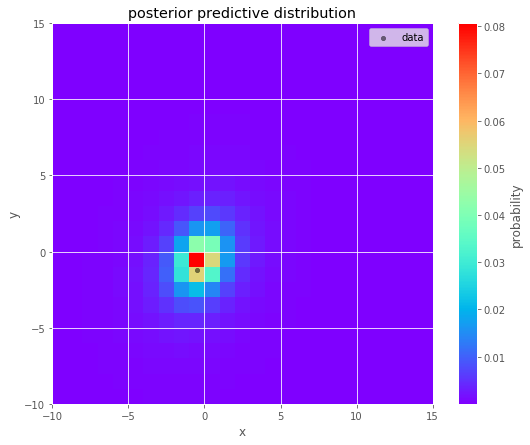

In [26]:
init()
i=0
k=0
_mu_k, _beta_k, _W_k, _nu_k = eq16_2(x[:,i:i+1], rho, i, k, m_0, beta_0, nu_0, W_0)

fig, ax = plt.subplots(ncols=1, figsize=(9, 7))

ax.set_aspect('equal')
ax.set_title('posterior predictive distribution')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

delta = 1
xrange = np.array([-10, 15])
yrange = np.array([-10, 15])
gx = np.arange(*(xrange + delta/2), delta)
gy = np.arange(*(yrange + delta/2), delta)
gxx, gyy = np.meshgrid(gx, gy)
gxgy = np.c_[gxx.ravel(), gyy.ravel()]

# parameters of posterior predictive distribution
zz = t_pdf(
    gxgy,
    m_0,
    beta_0 * (nu_0 + 1 - D) * W_0 / (1 + beta_0),
    (nu_0 + 1 - D)
)
zz = t_pdf(
    gxgy,
    _mu_k,
    _beta_k * (_nu_k + 1 - D) * _W_k / (1 + _beta_k),
    (_nu_k + 1 - D)
)

im = ax.imshow(
    zz.reshape(len(gx), len(gy)), 
    interpolation='none', 
    origin='lower',
    extent=list(xrange) + list(yrange),
    cmap=matplotlib.cm.rainbow
)
fig.colorbar(im, ax=ax).set_label('probability')
pd.DataFrame(x[:, 0].reshape(1, D), columns=['x', 'y']) \
    .plot(kind='scatter', x='x', y='y', c='black', ax=ax, label='data', alpha=0.5);

In [27]:
## fig, ax = plt.subplots(ncols=1, figsize=(9, 7))

def plot(x=pd.DataFrame()):
    delta = 0.5
    xrange = np.array([-10, 15])
    yrange = np.array([-10, 15])
    gx = np.arange(*(xrange + delta/2), delta)
    gy = np.arange(*(yrange + delta/2), delta)
    gxx, gyy = np.meshgrid(gx, gy)
    gxgy = np.c_[gxx.ravel(), gyy.ravel()]

    fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
    for k in range(K):
        zz = t_pdf(
            gxgy,
            mu_k[k],
            beta_k[k] * (nu_k[k] + 1 - D) * W_k[k] / (1 + beta_k[k]),
            (nu_k[k] + 1 - D)
        )

        cs = ax.contour(gxx, gyy, zz.reshape(len(gx), len(gy)))
        plt.clabel(cs, inline=1, fontsize=10)
    if not x.empty:
        x.plot(kind='scatter', x='x', y='y', ax=ax, color='red', alpha=0.5).set_aspect('equal')

39


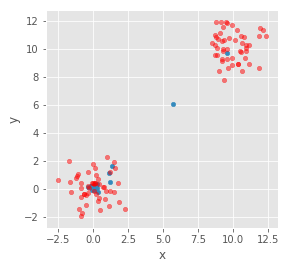

In [51]:
init()
i=0
k=0
alpha = 10
_mu_k, _beta_k, _W_k, _nu_k = eq16_2(x[:,i:i+1], rho, i, k, m_0, beta_0, nu_0, W_0)

mu_k[k] = _mu_k
beta_k[k] = _beta_k
W_k[k] = _W_k
nu_k[k] = _nu_k

for i in np.arange(1, N):
    for k in np.arange(K):
        w = rho[0:i, k].sum()
        rho[i, k] = eq15_1(w, D, x[:,i:i+1], mu_k[k], beta_k[k], nu_k[k], W_k[k])
    rho[i, K] = eq15_2(alpha, D, x[:,i:i+1], m_0, beta_0, nu_0, W_0)
    rho[i, 0:K+1] = rho[i, 0:K+1] / rho[i, 0:K+1].sum()
    
    if rho[i, K] > 0.01:
        for k in np.arange(K):
            _mu_k, _beta_k, _W_k, _nu_k = eq16_1(x[:,0:i+1], rho, i, k, m_0, beta_0, nu_0, W_0)
            mu_k[k] = _mu_k
            beta_k[k] = _beta_k
            W_k[k] = _W_k
            nu_k[k] = _nu_k
        
        _mu_k, _beta_k, _W_k, _nu_k = eq16_2(x[:,i:i+1], rho, i, K, m_0, beta_0, nu_0, W_0)
        mu_k[K] = _mu_k
        beta_k[K] = _beta_k
        W_k[K] = _W_k
        nu_k[K] = _nu_k
        
        K = K + 1
    else:
        rho[i, K] = 0
        rho[i, 0:K] = rho[i, 0:K] / rho[i, 0:K].sum()
        for k in np.arange(K):
            _mu_k, _beta_k, _W_k, _nu_k = eq16_1(x[:,0:i+1], rho, i, k, m_0, beta_0, nu_0, W_0)
            mu_k[k] = _mu_k
            beta_k[k] = _beta_k
            W_k[k] = _W_k
            nu_k[k] = _nu_k
    # plot(pd.DataFrame(x[:,:i+1].T, columns=['x', 'y']))

print(K)
ax = pd.DataFrame(mu_k.reshape(100, 2)[0:K], columns=['x','y']).plot(kind='scatter', x='x', y='y')
X.plot(kind='scatter', x='x', y='y', ax=ax, color='red', alpha=0.5).set_aspect('equal')

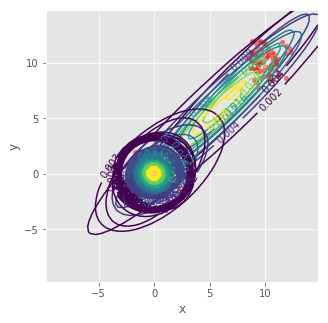

In [31]:
plot(pd.DataFrame(x[:, 0:i].T, columns=['x', 'y']))

In [61]:
mu_k[0]

array([[5.68710349],
       [6.03833985]])

In [57]:
print(rho.sum(axis=0)[0:K]/100)

[1.85830060e-01 5.93704223e-01 3.22521181e-02 1.46815935e-03
 2.20101435e-03 4.42842704e-04 1.51944844e-02 3.38781874e-04
 1.43938846e-04 1.46902018e-04 2.42316101e-04 1.37462918e-04
 9.38929287e-02 1.97274489e-02 1.14193946e-02 7.59675752e-03
 4.35225570e-03 3.59718772e-03 2.83240423e-03 3.35112326e-03
 1.21708324e-03 1.15227571e-03 2.11210226e-03 1.50335949e-03
 1.41183034e-03 1.11268222e-03 8.79015507e-04 8.25987429e-04
 1.16581840e-03 1.43025241e-03 1.92577932e-03 4.23127210e-04
 7.03669239e-04 6.03896107e-04 6.43929649e-04 4.85664791e-04
 1.76500762e-03 1.21462015e-03 5.52094101e-04]


In [56]:
# print(np.get_printoptions())
# np.set_printoptions(precision=8, linewidth=70)
rho[:,0:3]

{'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 200, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': False}


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10489854e-01, 8.89510146e-01, 0.00000000e+00],
       [1.79264995e-01, 4.29401836e-02, 7.77794821e-01],
       [1.64599676e-01, 7.42206898e-01, 5.38430254e-03],
       [3.47551631e-01, 4.96385143e-01, 1.65763250e-02],
       [3.54949885e-01, 5.95395157e-01, 1.09405333e-02],
       [3.31520960e-01, 1.44620507e-01, 1.41249698e-01],
       [4.13216124e-01, 5.39433392e-01, 1.22741759e-02],
       [2.00370091e-01, 7.78406285e-01, 6.24035048e-03],
       [3.61302861e-01, 6.15096524e-01, 8.04475288e-03],
       [2.23775083e-01, 7.67544701e-01, 5.79349643e-03],
       [1.45398670e-01, 8.14978186e-01, 1.55632676e-02],
       [1.16032395e-01, 8.60093682e-01, 1.00475699e-02],
       [2.54094127e-01, 1.14481114e-01, 8.15679291e-02],
       [2.58463194e-01, 1.31286772e-01, 8.05883054e-02],
       [2.47301944e-01, 7.45040297e-01, 4.83329769e-03],
       [2.43611327e-01, 1.00168985e-01, 7.40352173e-02],
       [1.94301026e-01, 1.19980